## Investigating the The Seattle Airbnb homes dataset
### Import Packages

In [1]:
import numpy as np
import pandas as pd

### Import Data Set

In [2]:
listings = pd.read_csv("listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Wrangling

In [3]:
#rows and columns of listings df
listings.shape

(3818, 92)

In [4]:
# Get the list of all column names from the listings df
listings.columns.values.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [5]:
#of the columns whats the data type
listings.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [6]:
#flaots and integers could be useful for analysis, let's see which columns fall under these:
listings.dtypes[listings.dtypes=='float64']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [7]:
#beds, bathrooms, square feet, score, cleanliness, review score values might be useful for analysis

In [8]:
listings.dtypes[listings.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [9]:
#Scrape ID & Licence column not needed

In [10]:
listings.drop(columns=['license','scrape_id'], inplace=True)

In [11]:
#Fix Price from an object to float
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].astype(float)

#Fix Cleaning fee
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace(',', '')
listings['cleaning_fee'] = listings['cleaning_fee'].astype(float)

C:\Users\aliat\AppData\Local\Temp\ipykernel_17264\3601498700.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '')
C:\Users\aliat\AppData\Local\Temp\ipykernel_17264\3601498700.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '')


In [12]:
#let's see which values are missing, express as %:
pd.set_option('display.max_rows',100)
(100*listings.isnull().sum()/listings.isnull().count()).sort_values(ascending=False)

square_feet                         97.459403
monthly_price                       60.267156
security_deposit                    51.126244
weekly_price                        47.380828
notes                               42.063908
neighborhood_overview               27.029859
cleaning_fee                        26.977475
transit                             24.463070
host_about                          22.498690
host_acceptance_rate                20.246202
review_scores_checkin               17.234154
review_scores_accuracy              17.234154
review_scores_value                 17.181771
review_scores_location              17.155579
review_scores_cleanliness           17.103195
review_scores_communication         17.050812
review_scores_rating                16.946045
last_review                         16.422211
reviews_per_month                   16.422211
first_review                        16.422211
space                               14.903091
host_response_time                

In [13]:
#Some columns are missing a lot of data. Square feet, monthly price could have been useful for analysis.

In [14]:
listings.drop(columns=['square_feet','monthly_price'], inplace=True)

### EDA

Histogram plot of initial int64 data types

C:\Users\aliat\AppData\Local\Temp\ipykernel_17264\874519920.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  listings.select_dtypes(include=['int64', 'float64']).hist(ax=fig.gca(),edgecolor='white', linewidth=1.2);


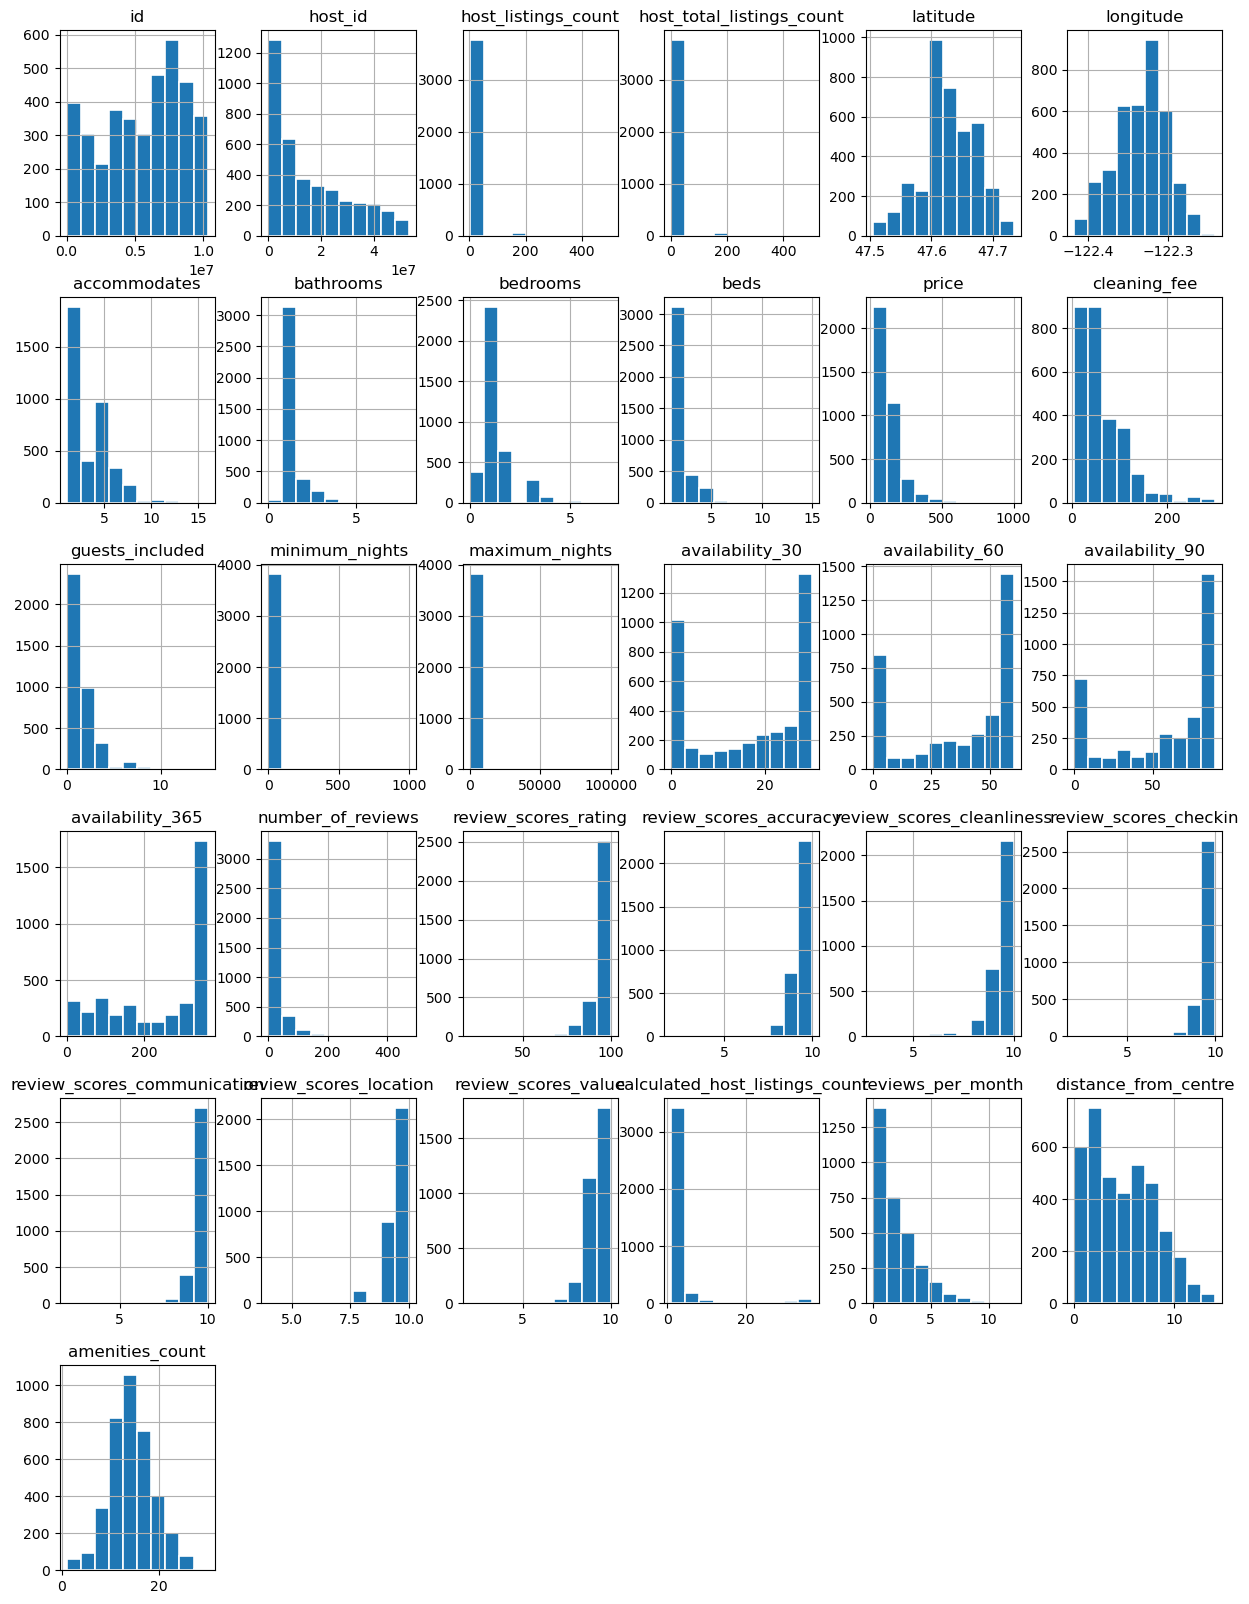

In [43]:
fig = plt.figure(figsize = (15,20))
listings.select_dtypes(include=['int64', 'float64']).hist(ax=fig.gca(),edgecolor='white', linewidth=1);

No additional insight is gained with these plots.

### Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

**Question:**
Does distance from city centre affect the price. From Google: "The latitude of Seattle, WA, USA is 47.608013, and the longitude is -122.335167. Seattle, WA, USA is located at United States country in the Cities place category with the gps coordinates of 47° 36' 28.8468'' N and 122° 20' 6.6012'' W."

In [20]:
import math

In [21]:
def distance_from_centre(lat, lon, centre=[47.608013, -122.335167]):
    '''
    Theory:
    https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
    
    INPUTS:
    
    
    OUTPUT:
    Distance between the point and the downtown.
    '''   
    R = 6371.0 #radius of earth
    city_lat = math.radians(centre[0])
    city_lon = math.radians(centre[1])
    lat_bnb = math.radians(lat)
    lon_bnb = math.radians(lon)
    
    dlon = lon_bnb - city_lon #delta values
    dlat = lat_bnb - city_lat
    
    a = math.sin(dlat / 2)**2 + math.cos(city_lat) * math.cos(lat_bnb) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    d = R * c
    
    return d

In [22]:
#Now we can create a loop to iterate through all rows to determine the distance from the city centre of Seattle

for i in range(len(listings)):
    #There were no missing long and lat values in the table so there should be 0 errors!
    listings.loc[i , 'distance_from_centre'] = distance_from_centre(listings.loc[ i ,'latitude'] , listings.loc[ i ,'longitude'])

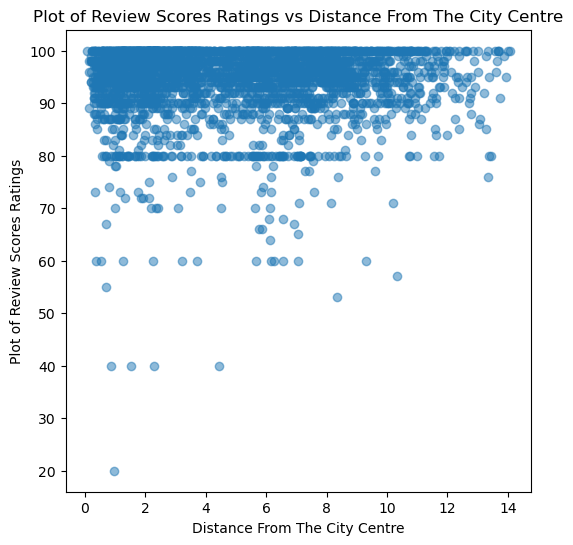

In [23]:
plt.figure(figsize = [6, 6])
plt.scatter(data=listings, x='distance_from_centre', y='review_scores_rating', alpha = 4/8);
plt.xlabel('Distance From The City Centre')

plt.ylabel('Plot of Review Scores Ratings')

plt.title('Plot of Review Scores Ratings vs Distance From The City Centre');

Plot above is hard to interpret, lets try a 2D Density Plot

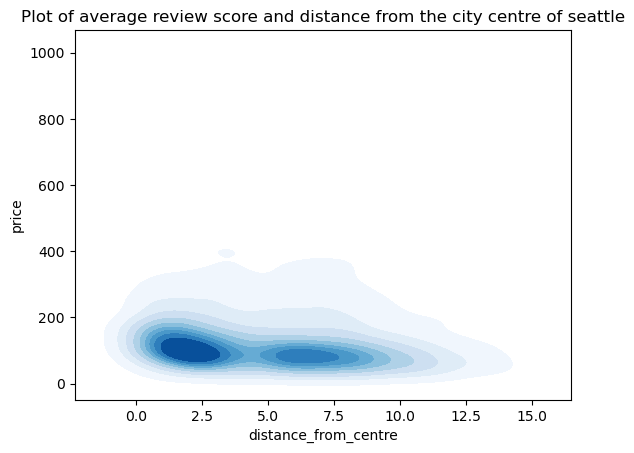

In [24]:
sb.kdeplot(x=listings.distance_from_centre, y=listings.price, cmap="Blues", shade=True).set(title="Plot of average review score and distance from the city centre of seattle");

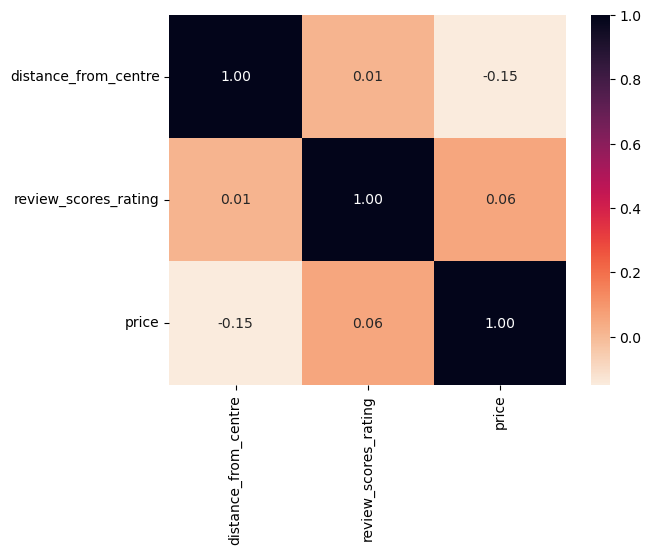

In [117]:
hm_columns = ['distance_from_centre', 'review_scores_rating',  'price']
sb.heatmap(listings[hm_columns].corr(), cmap='rocket_r', annot=True, fmt='.2f');

The correlation matrix shows when distance from the city centre of seattle is lower, the review score rating is higher. The correlation matrix also shows price is not affected by the review score sugesting the airbnb market in Seattle could have inelastic demand, as price does not effect the overall rating and people are happy regardless of what they pay for.

**Question:** Does the number of ammeneties offered by AirBnB hosts in Seattle affect the review score?

In [30]:
def count_items(value):
    """
    Counts items in amenities in format
    {wifi, heating,  etc}
    provides integer as output.
    """
    if type(value) == str:
        return len(value.split(','))
    else:
        return 0
    
listings['amenities_count'] = listings.amenities.apply(count_items)

In [36]:
listings.head(3)

,id,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,distance_from_centre,amenities_count
0,241032,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,f,WASHINGTON,f,moderate,f,f,2,4.07,4.136207,10
1,953595,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,f,WASHINGTON,f,strict,t,t,6,1.48,4.146264,16
2,3308979,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,f,WASHINGTON,f,strict,f,f,2,1.15,3.527566,21


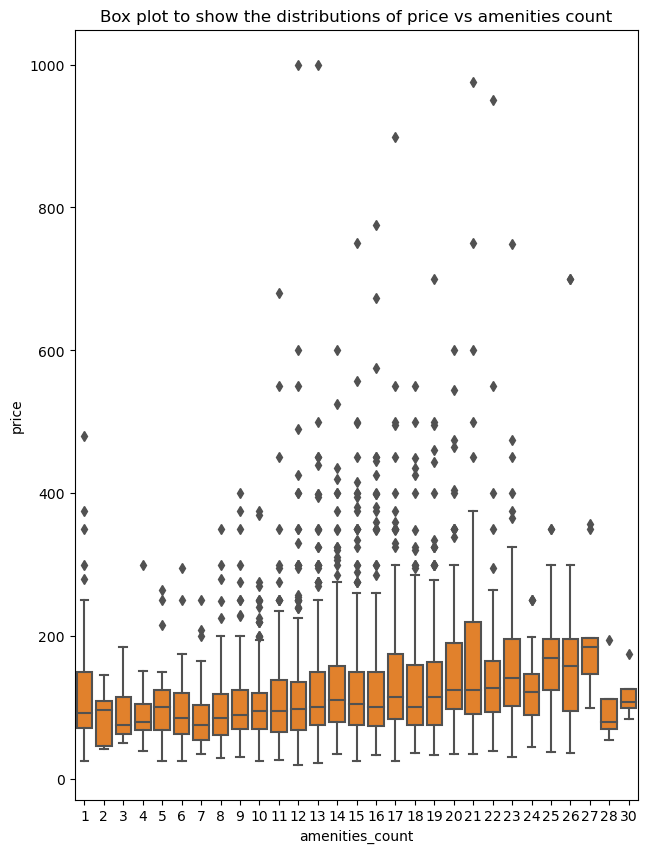

In [137]:
plt.figure(figsize = [16, 10])
plt.subplot(1, 2, 1)
sb.boxplot(data=listings , x='amenities_count' , y='price', color=sb.color_palette()[1]).set(title="Box plot to show the distributions of price vs amenities count");

A box plot was chosen to illustrate the large outlier listings which had extremely high prices. There is a somewhat noticeable trend with the boxplots where the medians are increasing upto listings having 27 amenities. 

In [33]:
listings.price.min()

20.0

In [34]:
listings.price.max()

1000.0

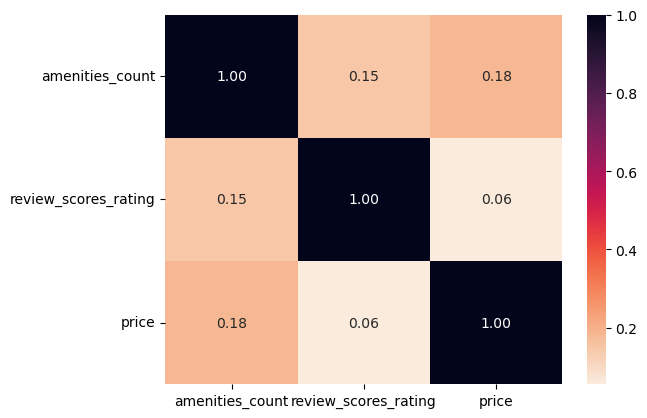

In [115]:
hm_columns = ['amenities_count','review_scores_rating',  'price']
sb.heatmap(listings[hm_columns].corr(), cmap='rocket_r', annot=True, fmt='.2f');

The number of amenities does marginally impact the overall review score rating of the AirBnB listings. Similarly, listings with more amenities tended to have slightly higher price.

**Question:** How many beds are needed in an AirBnB in Seattle to maximise the overall review score

In [37]:
#plot review_scores_rating vs review_scores_location & review_scores_communication

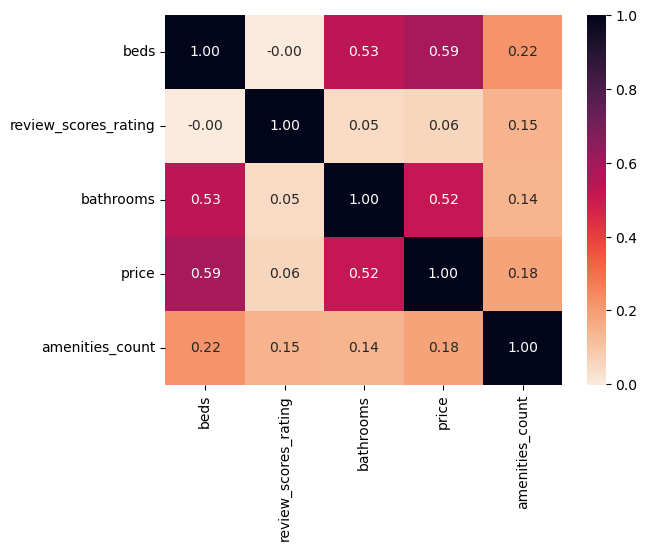

In [114]:
hm_columns = ['beds','review_scores_rating',  'bathrooms', 'price', 'amenities_count']
sb.heatmap(listings[hm_columns].corr(), cmap='rocket_r', annot=True, fmt='.2f');

As expected increasing the number of beds increased priced. More beds also related to having more bathrooms but there wasn't many meaningful correlations beyond this as having more beds did not increase the review score. 
This is good news for people who may want to join the AirBnB market with only 1/2 beds as having a smaller room won't affect your room score.

**Question:** Does having a larger cleaning fee have a negative correlation with review score

In [82]:
listings_q3=listings.dropna(subset = ['cleaning_fee']) #only test for rows which aren't missing values

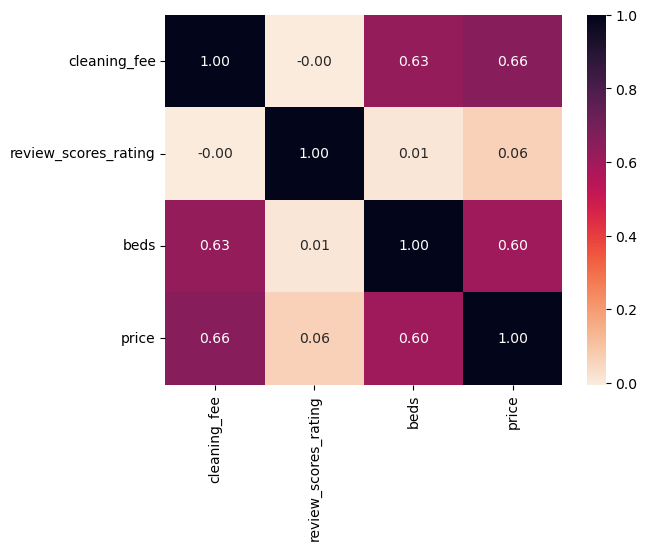

In [113]:
hm_columns = [ 'cleaning_fee','review_scores_rating', 'beds', 'price']
sb.heatmap(listings_q3[hm_columns].corr(), cmap='rocket_r', annot=True, fmt='.2f');

**Question:** Which neighbourhoods in Seattle have the highest ratings

In [71]:
#Drop missing rows with missing neighbourhood values
listings2 = listings.dropna(subset=['neighbourhood'])

In [64]:
listings.shape

(3818, 90)

In [65]:
listings2.shape

(3402, 90)

In [124]:
(listings2.groupby('neighbourhood')['review_scores_rating'].mean().sort_values(ascending=False)).head(7).reset_index().set_index('neighbourhood')

,review_scores_rating
neighbourhood,
Arbor Heights,98.000000
High Point,97.750000
Windermere,97.500000
Yesler Terrace,97.454545
Harrison/Denny-Blaine,97.181818
Madrona,97.151515
Genesee,96.846154


In [123]:
(listings2.groupby('neighbourhood')['distance_from_centre', 'review_scores_rating'].mean().sort_values(by='review_scores_rating', ascending=False)).head(7).reset_index().set_index('neighbourhood')

C:\Users\aliat\AppData\Local\Temp\ipykernel_17264\1518008145.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (listings2.groupby('neighbourhood')['review_scores_rating', 'distance_from_centre'].mean().sort_values(by='review_scores_rating', ascending=False)).head(7).reset_index().set_index('neighbourhood')


,review_scores_rating,distance_from_centre
neighbourhood,,
Arbor Heights,98.000000,11.429512
High Point,97.750000,7.638375
Windermere,97.500000,8.446954
Yesler Terrace,97.454545,1.208777
Harrison/Denny-Blaine,97.181818,3.672537
Madrona,97.151515,3.400069
Genesee,96.846154,6.093745


4 out the top 5 locations are over 3 miles away from the city centre, seems like the best rated locations are away from the city ce

In [102]:
aki_listings = listings2[listings2['neighbourhood'].str.match('Arbor Heights')]
#aki_listings

Only 3 rows. When manually checked, Arbor Heights does seem like a cosy location away from the city centre.

**Question:** Of the AirBnB properties listed, Which neighbourhoods have the most ammeneties

In [129]:
listings2.groupby('neighbourhood')['amenities_count', 'distance_from_centre', 'review_scores_rating'].mean().sort_values(by='amenities_count', ascending=False).head(6).reset_index().set_index('neighbourhood')

C:\Users\aliat\AppData\Local\Temp\ipykernel_17264\143226204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  listings2.groupby('neighbourhood')['amenities_count', 'distance_from_centre', 'review_scores_rating'].mean().sort_values(by='amenities_count', ascending=False).head(6).reset_index().set_index('neighbourhood')


,amenities_count,distance_from_centre,review_scores_rating
neighbourhood,,,
Pike Market,19.000000,0.447411,95.000000
Central Business District,18.604938,0.444951,94.478873
Interbay,18.571429,4.913709,90.333333
Belltown,18.362745,1.153209,93.340659
South Lake Union,18.238095,1.447661,94.533333
Pike Place Market,17.923077,0.466396,94.225806


In contrast to the previous question, the neighbourhoods with the most amenities were also some of the neighbourhoods closest to the city centre.

## Findings
For Airbnb listings in Seattle, it can be seen from the analysis above that:
- When the distance from the city centre is higher, the review score rating tends to be higher. This could be attributed to better quality properties away from the city centre i.e. size, amenities, etc.
- The correlation matrix also shows price is not affected by the review score, suggesting the Airbnb market in Seattle could have inelastic demand. This could be due to people being happy with the quality of the property they paid for. Or customers correctly anticipated the price of the listings to be in line with their expected quality.
- The number of amenities does marginally impact the overall review score rating of the AirBnB listings. Similarly, listings with more amenities tended to have a slightly higher price.
- As expected increasing the number of beds has no relationship with the review score rating. This is good news for people who may want to join the market with only i.e. 1 bed as it won't affect the listings rating.
- Similarly, landlords no longer have to feel worried if large cleaning fees will impact their listings rating as the data suggests there isn't much of a correlation between the two variables. Of course, landlords should be sensible when deciding a cleaning fee as the fee amount should reflect the number of beds there are in their listings.
- The analysis from the dataset showed the highest-rated neighbourhoods listed tended to be further away from the city centre. In contrast, the neighbourhoods with the most amenities were also some of the closest neighbourhoods to the city centre.